In [1]:
import scipy.fftpack as fft
import scaleogram as scg
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy.signal as signal
from matplotlib.pyplot import figure

## Курсовая работа по курсу "Введение в методы обработки и анализа данных"

### Тема "Wavelet анализ"
#### Выполнил: студент группы М80-103М-19 Бобряков А.С.

## Теоретическая часть

### 1. Преобразование Фурье

Преобразование Фурье — операция, сопоставляющая одной функции вещественной переменной другую функцию вещественной переменной. Эта новая функция описывает коэффициенты («амплитуды») при разложении исходной функции на элементарные составляющие — гармонические колебания с разными частотами.

Преобразование Фурье функции f вещественной переменной является интегральным и задаётся следующей формулой:

<img src="project/1.jpg">

Но преобразование Фурье дает информацию только про частоту, которая присутствует в сигнале и не дает никакой информации про то, в какой промежуток времени эта частота присутствует в сигнале, например:

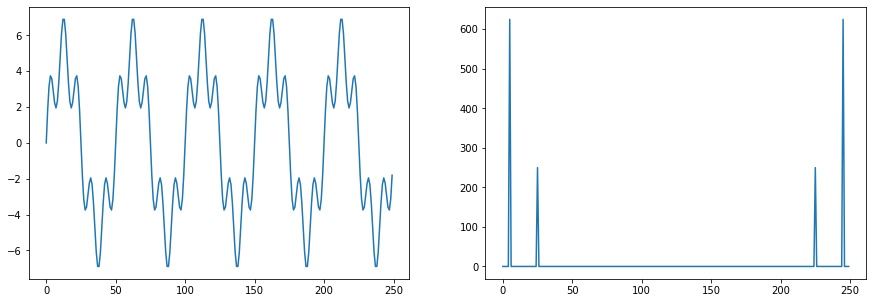

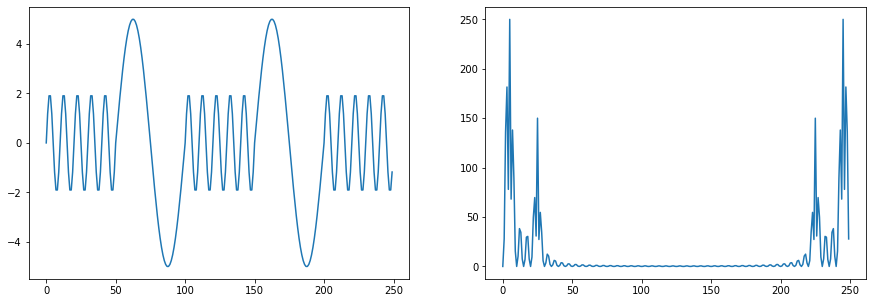

In [2]:
# Функия 1 для анализа 
def function1(x):
    return 2*np.sin(2*np.pi*x /10) + 5*np.sin(2*np.pi*x /50)
# Функия 2 для анализа 
def function2(x):
    if (x<50 or (x>100 and x<150) or x>200):
        return 2*np.sin(2*np.pi*x /10)
    else:
        return 5*np.sin(2*np.pi*x /50)
    
# Первая функция
x1 = [t for t in np.arange(0,250,1)]
y1 = [function1(t) for t in np.arange(0,250,1)]
y_fft1 = fft.fft(y1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(x1, y1)
ax2.plot(np.abs(y_fft1))
# Вторая функция
x2 = [t for t in np.arange(0,250,1)]
y2 = [function2(t) for t in np.arange(0,250,1)]
y_fft2 = fft.fft(y2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(x2, y2)
ax2.plot(np.abs(y_fft2))

Таким образом, для двух абсолютно разных сигналов мы можем получить почти одинаковые преобразования Фурье.
Решение - оконное преобразование Фурье


### 2. Оконное преобразование Фурье

Оконное преобразование Фурье — это разновидность преобразования Фурье, определяемая следующим образом:
<img src="project/3.jpg">
где W(t-T) — некоторая оконная функция

Оконное преобразования Фурье, в отличии от обычного преобразования Фурье, уже является функцией от времени, частоты и амплитуды. То есть она позволяет получать характеристику распределения частоты сигнала (с амплитудой) во времени.

(26, 11) (26, 11) (26, 11)
(16, 18) (16, 18) (16, 18)


Text(0.5, 0, 'Амплитуда')

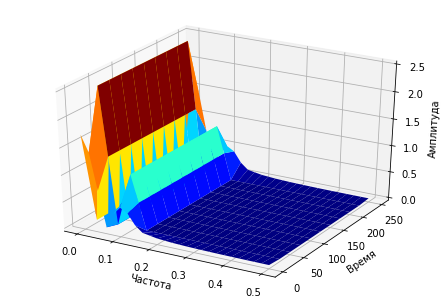

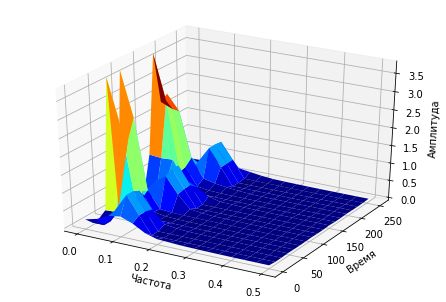

In [3]:
# ОКОННОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ
# Первая функция
f1, t1, Z1 = signal.stft(y1, nperseg=50)
X1, Y1 = np.meshgrid(t1, f1)
print(X1.shape, Y1.shape, Z1.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y1, X1, np.abs(Z1), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

# Первая функция
f2, t2, Z2 = signal.stft(y2, nperseg=30)
X2, Y2 = np.meshgrid(t2, f2)
print(X2.shape, Y2.shape, Z2.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y2, X2, np.abs(Z2), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

Но главной проблемой в использовании оконного преобразования Фурье для получения частотно-временной характеристики сигнала является так называемый принцип неопределенности Гейзенберга, который возникает для параметров времени и частоты сигнала.
В основе принципа неопределенности лежит тот факт, что невозможно сказать точно какая частота присутствует в сигнале в данный момент времени (можно говорить только про диапазон частот) и не возможно сказать в какой точно момент времени частота присутствует в сигнале (можно говорить лишь про период времени).
В связи с этим возникает проблема разрешающей способности. Разрешающую способность оконного преобразования Фурье можно регулировать с помощью ширины окна.

(6, 51) (6, 51) (6, 51)
(51, 6) (51, 6) (51, 6)


Text(0.5, 0, 'Амплитуда')

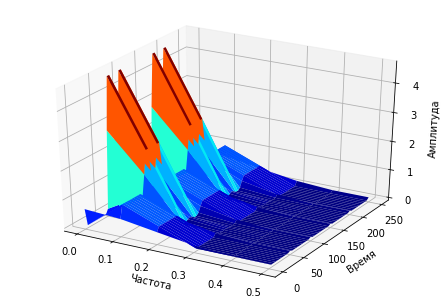

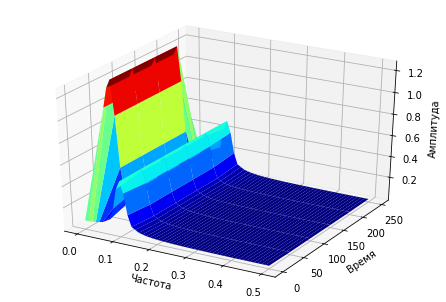

In [4]:
# МАЛОЕ ОКНО
f2, t2, Z2 = signal.stft(y2, nperseg=10)
X2, Y2 = np.meshgrid(t2, f2)
print(X2.shape, Y2.shape, Z2.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y2, X2, np.abs(Z2), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

# БОЛЬШОЕ ОКНО
f2, t2, Z2 = signal.stft(y2, nperseg=100)
X2, Y2 = np.meshgrid(t2, f2)
print(X2.shape, Y2.shape, Z2.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y2, X2, np.abs(Z2), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

 Таким образом при увеличении ширины окна (уменьшении его разрешающей способности) мы увеличиваем точность относительно частоты и уменьшаем точность относительно времени.
Какое тогда подобрать значение ширины окна, чтобы добиться оптимального соотношения точностей? На этот вопрос отвечает вейвлет-преобразование

### Wavelet-преобразование

Вейвлет-преобразование (англ. Wavelet transform) — интегральное преобразование, которое представляет собой свертку вейвлет-функции с сигналом. Вейвлет-преобразование переводит сигнал из временного представления в частотно-временное.

<img src="project/4.jpg">

Материнский вейвлет — это функция, которая является прототипом для всех окон, которые будут генерироваться во время вейвлет-преобразования.  
Сдвиг по времени регулирует движение генерированных окон по временной компоненте сигнала.  
Понятие масштаба является обратным к понятию ширины окна. Чем меньше ширина окна, тем больше масштаб, то есть окно захватывает меньшую часть сигнала и сигнал интегрируется более «детально».  
Чем больше ширина окна, тем меньший масштаб, то есть окно захватывает бОльшую часть сигнала и сигнал, соответственно, интегрируется менее «детально».

Вейвлет-преобразования, в отличии от оконного преобразования Фурье, которое имеет постоянный масштаб в любой момент времени для всех частот, имеет лучшее представление времени и худшее представление частоты на низких частотах сигнала и лучшее представление частоты с худшим представлением времени на высоких частотах сигнала.


**Вейвлет преобразования дает возможность уменьшить влияние принципа неопределенности Гейзенберга на полученном частотно-временном представлении сигнала. С его помощью низкие частоты имеют более детальное представление относительно времени, а высокие — относительно частоты.**

**Вейвлет-преобразование является более детализированным по времени в области высоких значений масштаба (низких частот) и менее детализирована в области низких значений масштаба (высоких частот)**

## "Мексиканская шляпа"

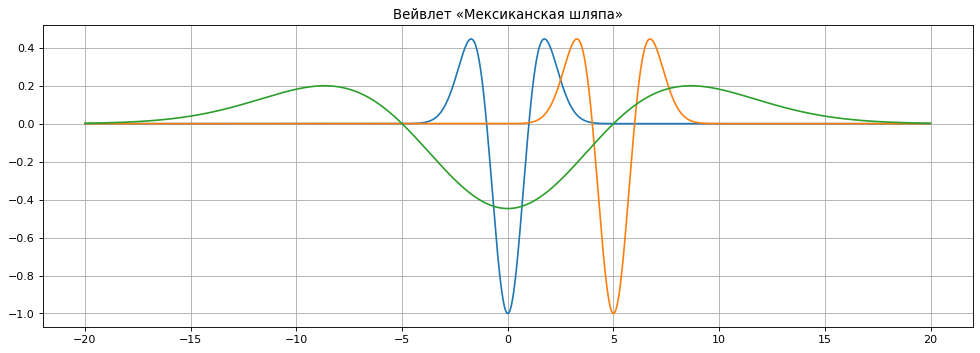

In [5]:
# Вейвлет "Мексиканская шляпа"
def HAT(s,T,t):
    # s - масштаб, T - сдвиг по времени, t - время по которому интегрируем
    f = (1/s**0.5)*np.exp(-0.5*((t-T)/s)**2)* (((t-T)/s)**2-1)  # формула шляпы
    return f

x = np.arange(-20,20,0.01)

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title("Вейвлет «Мексиканская шляпа»")
y=[HAT(1,0,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=0") 
y=[HAT(1,5,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=5") 
y=[HAT(5,0,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ масштаб=5, сдвиг по времени=0")   

plt.grid(True)
plt.show()

### Анализ наших функций

In [6]:
# Функция вейвлета
def waveletHat1(a,b): 
    # a - масштаб, b - сдвиг по времени, f- функция начальная
    f = lambda t :(1/a**0.5)*np.exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*function1(t)  # ШЛЯПА
    r = quad(f, -250, 250)
    return round(r[0],3)
def waveletHat2(a,b): 
    # a - масштаб, b - сдвиг по времени, f- функция начальная
    f = lambda t :(1/a**0.5)*np.exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)*function2(t)  # ШЛЯПА
    r = quad(f, -250, 250)
    return round(r[0],3)

In [7]:
# Считаем первую функцию по wavelet
Scale1 = np.arange(1, 50, 1)
Time1 = np.arange(1, 100, 1)
Ampl1 = np.array([waveletHat1(s,T) for T in Time1 for s in Scale1])
print(Scale1.shape, Time1.shape, Ampl1.shape)

# Считаем вторую функцию по wavelet
Scale2 = np.arange(1, 50, 1)
Time2 = np.arange(1, 100, 1)
Ampl2 = np.array([waveletHat2(s,T) for T in Time2 for s in Scale2])
print(Scale2.shape, Time2.shape, Ampl2.shape)

(49,) (99,) (4851,)


G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.
G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Remove the CWD from sys.path while we load stuff.


(49,) (99,) (4851,)


(49, 99)
(49, 99)


Text(0.5, 0, 'Амплитуда')

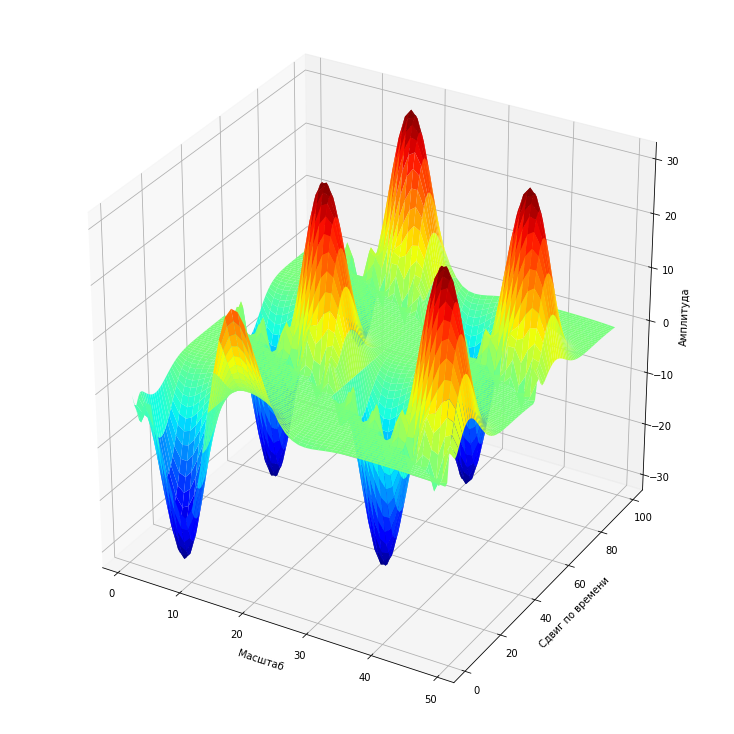

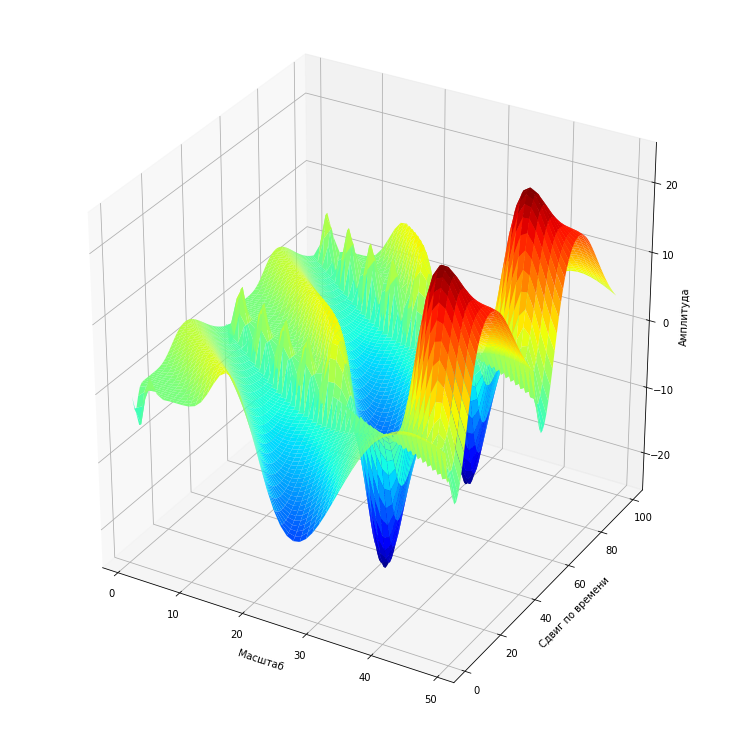

In [8]:
# Рисуем Wavelet-преобразование для первой функции
X1, Y1 = np.meshgrid(Time1, Scale1)
print(X1.shape)
Z1 = Ampl1.reshape(49,-1)
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.plot_surface(Y1, X1, Z1, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Масштаб")
ax.set_ylabel("Сдвиг по времени")
ax.set_zlabel("Амплитуда")

# Рисуем Wavelet-преобразование для второй функции
X2, Y2 = np.meshgrid(Time2, Scale2)
print(X2.shape)
Z2 = Ampl2.reshape(49,-1)
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.plot_surface(Y2, X2, Z2, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Масштаб")
ax.set_ylabel("Сдвиг по времени")
ax.set_zlabel("Амплитуда")

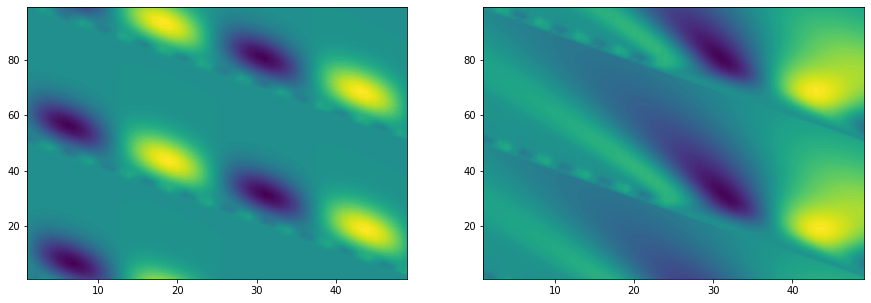

In [9]:
# Срезы
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.contourf(Y1, X1, Z1, 100)
ax2.contourf(Y2, X2, Z2, 100)

Видим, что:
- 1) На левом графике низкая и высокая частота присутствуют на всем диапазоне 
- 2) На правом графике высокая частота только первой половине временной шкалы, а низкая частота на второй

(49, 250)
(49, 250)


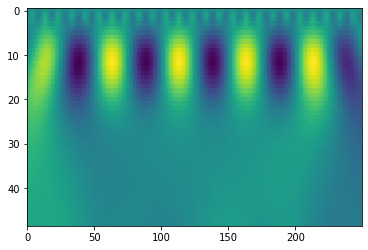

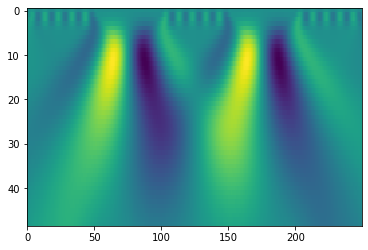

In [10]:
# Тоже самое в Scipy
widths = np.arange(1, 50, 1)
cwtmatr = signal.cwt(y1, signal.ricker, widths)
print(cwtmatr.shape)
plt.imshow(cwtmatr,  aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.figure()

widths = np.arange(1, 50, 1)
cwtmatr = signal.cwt(y2, signal.ricker, widths)
print(cwtmatr.shape)
plt.imshow(cwtmatr,  aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

## "Морле"

G:\Programs\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


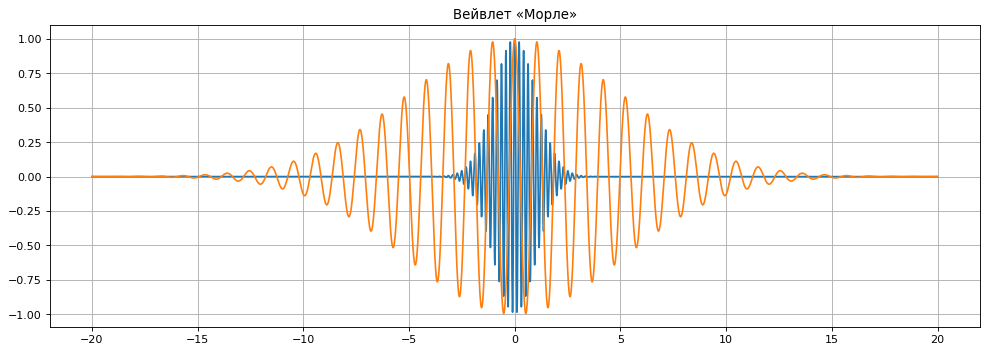

In [11]:
# Комплексный вейвлет "Морле"
def MORLE(s,T,t):
    # s - масштаб, T - сдвиг по времени, t - время по которому интегрируем
    f = np.exp(-0.5*((t-T)/s)**2) * np.exp(1j * 30 * (t-T)/s)  # формула Морле
    return f

x = np.arange(-20,20,0.01)

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title("Вейвлет «Морле»")
y=[MORLE(1,0,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=0") 
y=[MORLE(5,0,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=0") 
plt.grid(True)
plt.show()

G:\Programs\Anaconda3\lib\site-packages\scipy\signal\wavelets.py:364: ComplexWarning: Casting complex values to real discards the imaginary part
  mode='same')


(19, 250)
(19, 250)


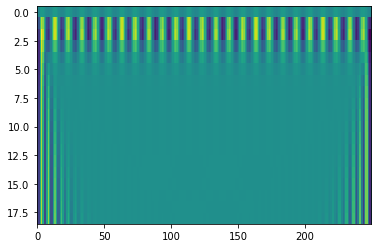

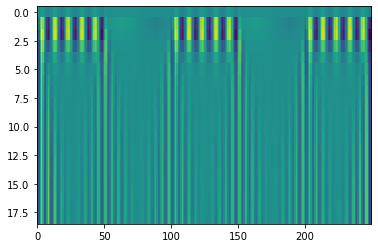

In [12]:
# Тоже самое в Scipy
widths = np.arange(1, 20, 1)
cwtmatr = signal.cwt(y1, signal.morlet, widths)
print(cwtmatr.shape)
plt.imshow(cwtmatr,  aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.figure()

widths = np.arange(1, 20, 1)
cwtmatr = signal.cwt(y2, signal.morlet, widths)
print(cwtmatr.shape)
plt.imshow(cwtmatr,  aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

### Функция,похожая на wavelet Морле

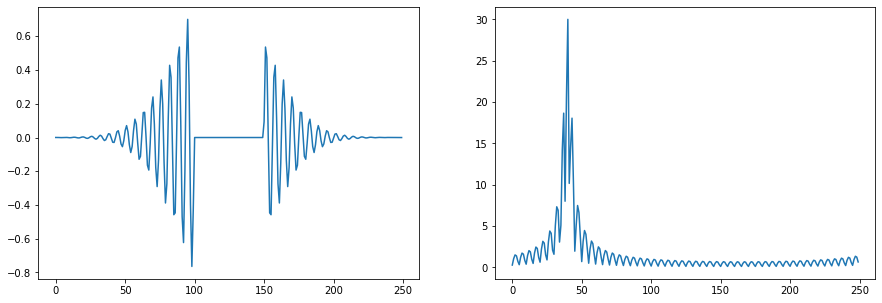

In [18]:
x3 = [t for t in np.arange(0,250,1)]
y3 = [MORLE(30,120,t) for t in np.arange(0,250,1)]
y3[100:150] = np.zeros(50)

y_fft3 = fft.fft(y3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(x3, y3)
ax2.plot(np.abs(y_fft3))

(50, 11) (50, 11) (50, 11)


Text(0.5, 0, 'Амплитуда')

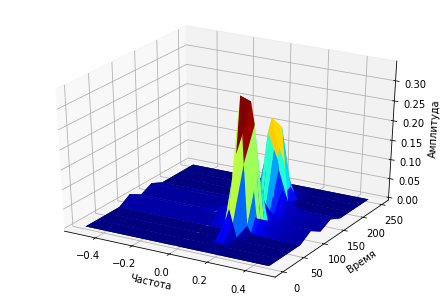

In [19]:
# ОКОННОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ
f3, t3, Z3 = signal.stft(y3, nperseg=50)
X3, Y3 = np.meshgrid(t3, f3)
print(X3.shape, Y3.shape, Z3.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y3, X3, np.abs(Z3), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

(49, 250)
(49, 250)


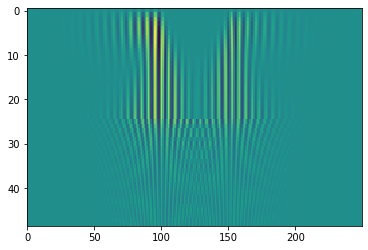

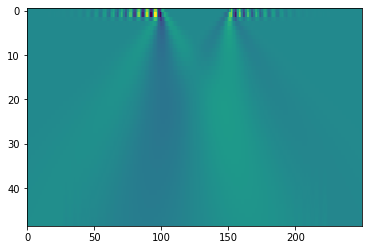

In [22]:
# МОРЛЕ
widths = np.arange(1, 50, 1)
cwtmatr = signal.cwt(y3, signal.morlet, widths)
print(cwtmatr.shape)
plt.imshow(cwtmatr,  aspect='auto')
plt.figure()

# Шляпа
widths = np.arange(1, 50, 1)
cwtmatr = signal.cwt(y3, signal.ricker, widths)
print(cwtmatr.shape)
plt.imshow(cwtmatr,  aspect='auto')

### Выводы:  
В ходе работы были рассмотрены Преобразование Фурье, его недостатка; далее Оконное Преобразование Фурье с его недостатками; далее проанализировано Wavelet преобразование.  
Были рассмотрены материнские wavelet-ы: "Мексиканская шляпа", "Морле", а также попытка построить свой материнский wavelet.  
Для каждого преобразования построены преобразования на простых стационарных сигналах, а также на нестационарных.